<h2>IMPORTING NECESSARY LIBRARY</h2>

In [1]:
#IMPORT NECESSARY LIBRARY 
import numpy as np
import pandas as pd

import seaborn as sbn
import matplotlib.pyplot as plt

<h2>IMPORTING DATA FILES</h2>

In [2]:
# IMPORT THE THREE DATASETS
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\Hima Chandana\AppData\Local\Temp\ipykernel_30568\1699282656.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


<h2> SHAPE OF THE DATA SETS</h2>

In [6]:
print("The shape of books dataset is :",books.shape)
print("The shape of ratings dataset is :",ratings.shape)
print("The shape of users dataset is :",users.shape)

The shape of books dataset is : (271360, 8)
The shape of ratings dataset is : (1149780, 3)
The shape of users dataset is : (278858, 3)


<H2> MISSING VALUES AND DATA IMPUTATION</H2>

In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
ratings.duplicated().sum()

0

In [12]:
users.duplicated().sum()

0

In [13]:
books['Book-Title'].nunique()

242135

In [14]:
Book_Count_df=pd.DataFrame(books['Book-Title'].value_counts())
Book_Count_df

,Book-Title
Selected Poems,27
Little Women,24
Wuthering Heights,21
The Secret Garden,20
Dracula,20
...,...
What Every Kid Should Know,1
The Seventh Enemy (A Brady Coyne Mystery),1
A Brace of Skeet,1
"The Yellow Admiral (O'Brian, Patrick, Aubrey/Maturin Novels, 18.)",1


In [15]:
Book_Count_df.reset_index(inplace=True)

In [16]:
Book_Count_df

,index,Book-Title
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,The Secret Garden,20
4,Dracula,20
...,...,...
242130,What Every Kid Should Know,1
242131,The Seventh Enemy (A Brady Coyne Mystery),1
242132,A Brace of Skeet,1
242133,"The Yellow Admiral (O'Brian, Patrick, Aubrey/M...",1


In [17]:
User_Rating_Count=pd.DataFrame(ratings['User-ID'].value_counts())
User_Rating_Count

,User-ID
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1
116137,1


In [18]:
User_Rating_Count.reset_index(inplace=True)

In [19]:
User_Rating_Count

,index,User-ID
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
105278,116180,1
105279,116166,1
105280,116154,1
105281,116137,1


<H3> MERGING BOOKS.CSV FILE </H3>

In [20]:
ratings_with_name = ratings.merge(books,on='ISBN')
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [21]:
ratings_with_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [22]:
value = ratings_with_name.loc[ratings_with_name['User-ID'] == 2].values[0]
print(value)

[2 '0195153448' 0 'Classical Mythology' 'Mark P. O. Morford' 2002
 'Oxford University Press'
 'http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg'
 'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'
 'http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg']


<H1> DATA VISUALIZATION </H1>

In [23]:
##PERFORMING EDA ON NUMERICAL COLUMNS..

In [24]:
#Histogram for Book rating

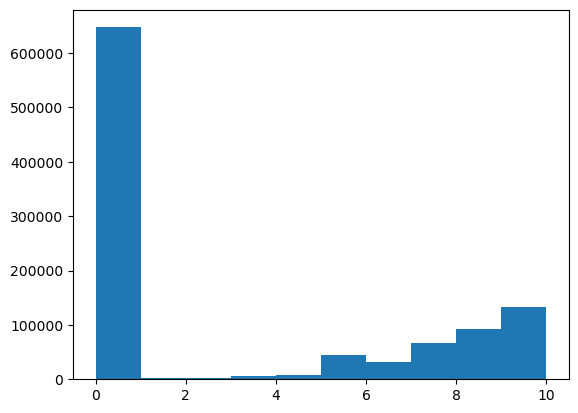

Skewdness of Book-Rating: 0.7524189628269686
Kurtosis of Book-Rating: -1.2150336351787108


In [25]:
import matplotlib.pyplot as plt
plt.hist(ratings_with_name['Book-Rating'])
plt.show()
print("Skewdness of Book-Rating:",ratings_with_name['Book-Rating'].skew())
print("Kurtosis of Book-Rating:",ratings_with_name['Book-Rating'].kurt())

<H1> PERFORMING BAR GRAPHS WITH TOP 10 CATEGORIES </H1>

In [26]:
##LET US PERFORM THE DATA VISUALIZATION FOR CATEGORICAL COLUMNS THAT IS BAR GRAPH AND IDENTIFY THE TOP 10 CATEGORIES

In [27]:
# Get the top 10 categories for ISBN
top_10=ratings_with_name["ISBN"].value_counts().head(10)
top_10

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0142001740     615
067976402X     614
0671027360     586
0446672211     585
Name: ISBN, dtype: int64

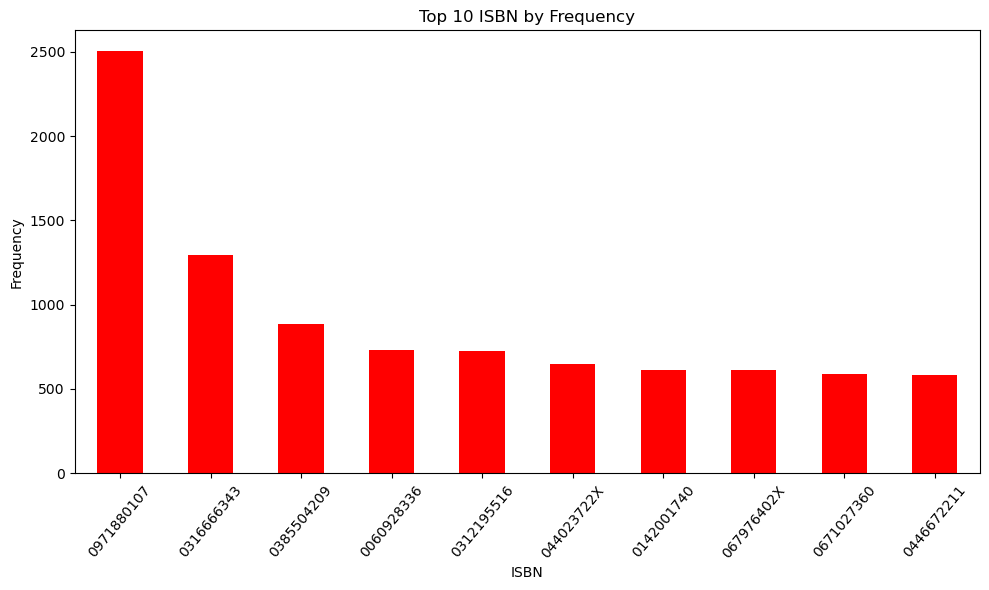

In [28]:
# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = "Red")
plt.xlabel('ISBN')
plt.ylabel('Frequency')
plt.title("Top 10 ISBN by Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
# Get the top 10 categories Book-Title
top_10=ratings_with_name["Book-Title"].value_counts().head(10)
top_10

Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: Book-Title, dtype: int64

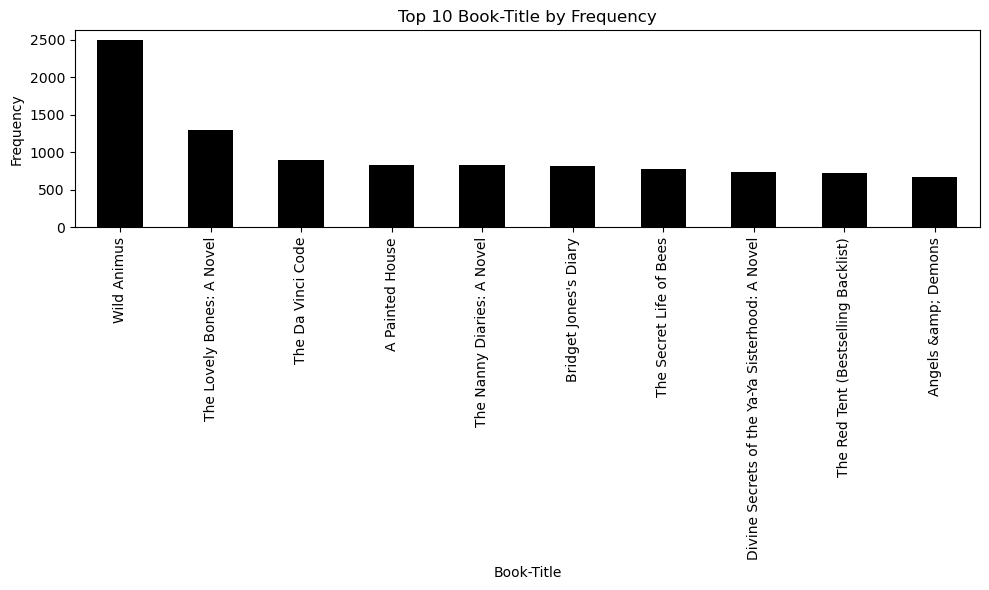

In [30]:
# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = 'black')
plt.xlabel('Book-Title')
plt.ylabel('Frequency')
plt.title("Top 10 Book-Title by Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
# Get the top 10 categories Book-Author
top_10=ratings_with_name["Book-Author"].value_counts().head(10)
top_10

Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
Dean R. Koontz         4313
Tom Clancy             4036
Danielle Steel         3726
Sue Grafton            3457
Janet Evanovich        3350
Name: Book-Author, dtype: int64

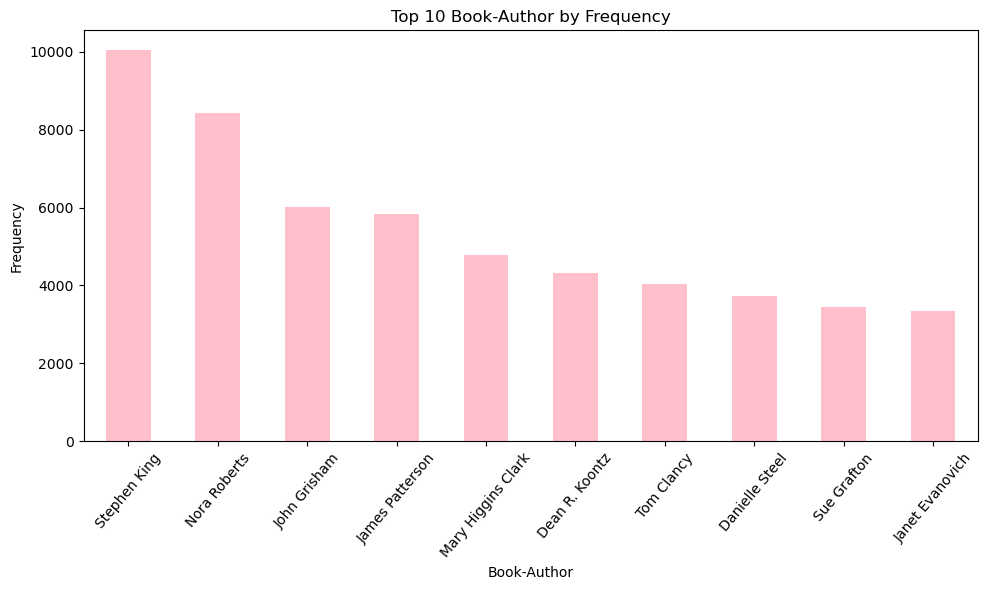

In [32]:
# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = 'Pink')
plt.xlabel('Book-Author')
plt.ylabel('Frequency')
plt.title("Top 10 Book-Author by Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

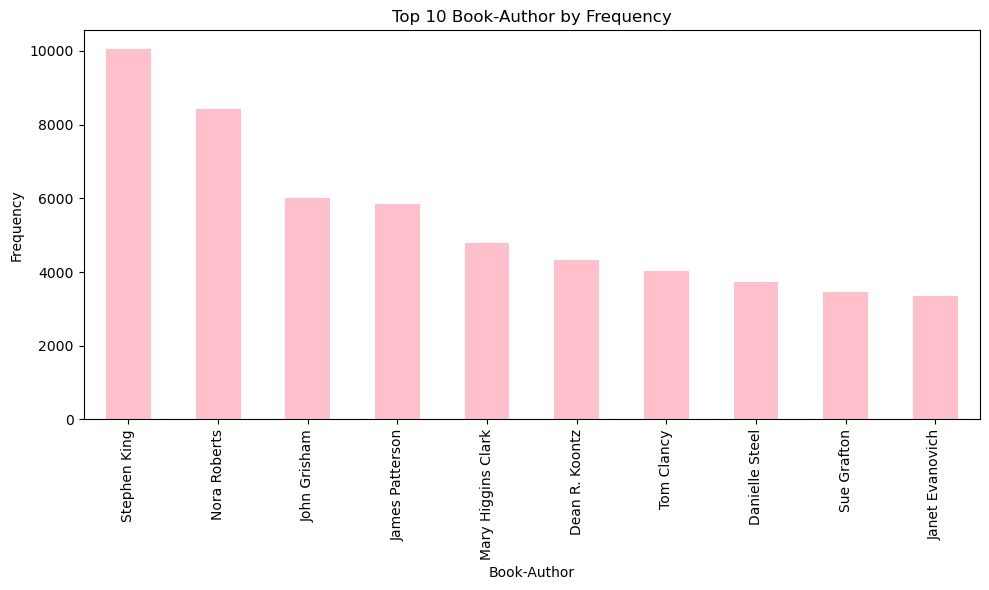

In [33]:
# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = 'Pink')
plt.xlabel('Book-Author')
plt.ylabel('Frequency')
plt.title("Top 10 Book-Author by Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
# Get the top 10 categories for Publisher
top_10=ratings_with_name["Publisher"].value_counts().head(10)
top_10

Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: Publisher, dtype: int64

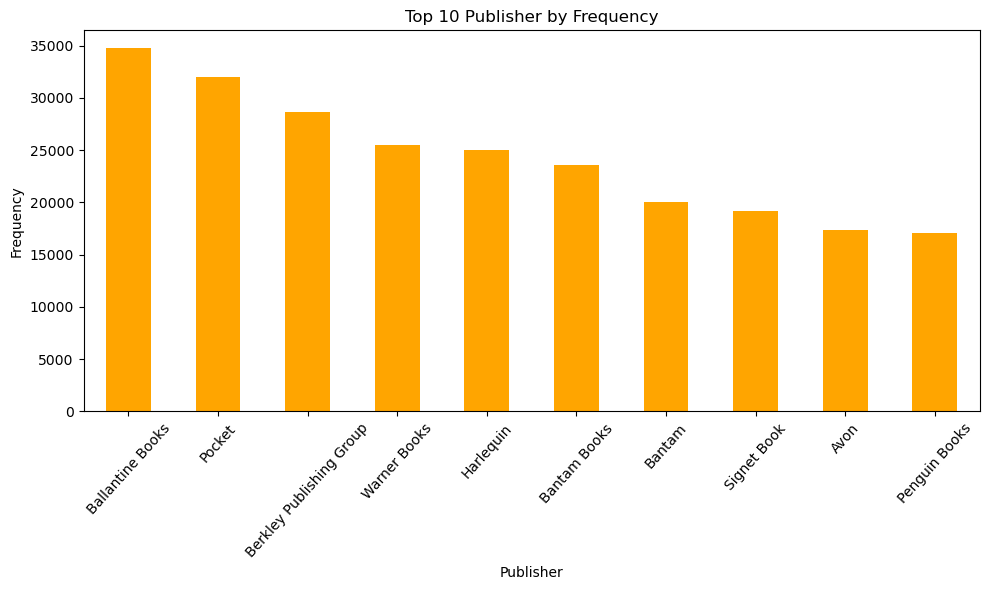

In [35]:
# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10.plot(kind='bar',color = 'orange')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.title("Top 10 Publisher by Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# Get the top 10 categories forISBN 
top_10=ratings_with_name["ISBN"].value_counts().head(10)
top_10

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0142001740     615
067976402X     614
0671027360     586
0446672211     585
Name: ISBN, dtype: int64

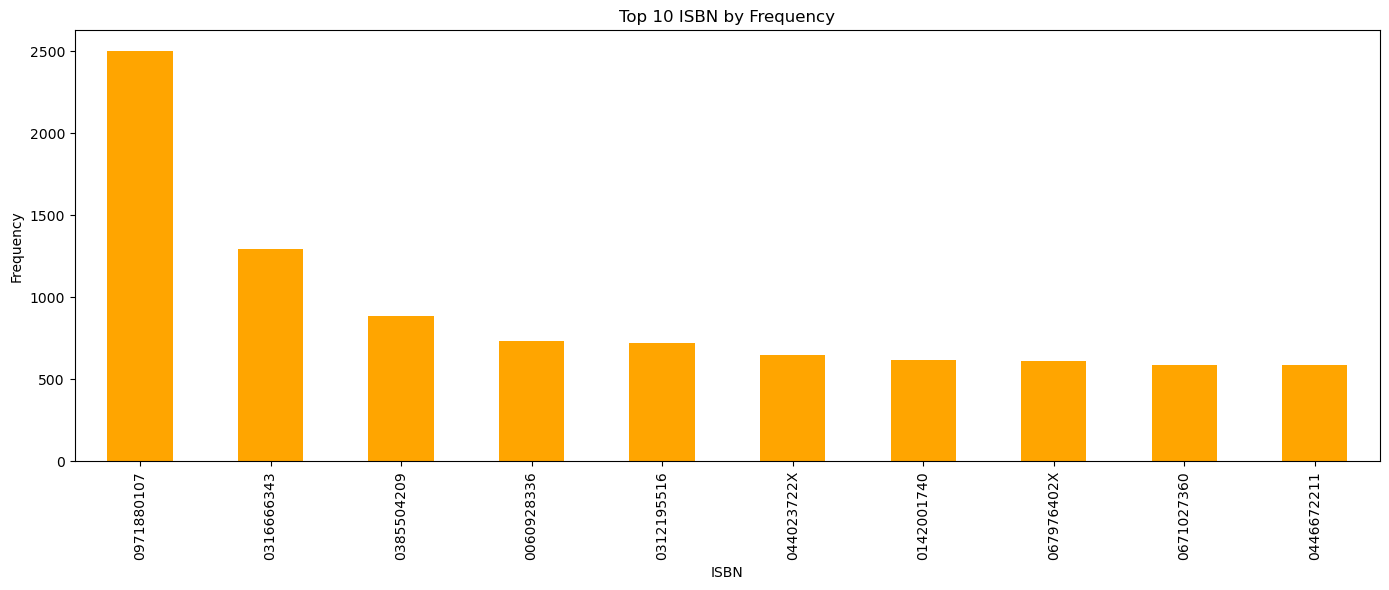

In [40]:
# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
top_10.plot(kind='bar',color = 'orange')
plt.xlabel('ISBN')
plt.ylabel('Frequency')
plt.title("Top 10 ISBN by Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h2>SORTING VALUES AND RESETTING INDEX NECESSARY FOR MODEL DEVELOPMENT </h2>

In [44]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [45]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [46]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,Book-Rating_x,Book-Rating_y
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [47]:
popular_df = popular_df[popular_df['Book-Rating_x']>=250].sort_values('Book-Rating_y',ascending=False).head(50)
popular_df

,Book-Title,Book-Rating_x,Book-Rating_y
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [48]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Book-Rating_x','Book-Rating_y']]
popular_df

,Book-Title,Book-Author,Image-URL-M,Book-Rating_x,Book-Rating_y
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


<h1> COLLABORATIVE FILETRING BASED RECOMMENDATION SYSTEM</h1>

In [49]:
###########Collaborative Filtering Based Recommender System

Collaborative Filtering Based Recommender System

Selecting Users who have rated more than 200 books

There are only 811 users who have rated more than 200 books.

Selecting only those books which have more than 50 ratings

In [50]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [51]:
x.value_counts()

False    91295
True       811
Name: Book-Rating, dtype: int64

In [52]:
wellread_users = x[x].index
wellread_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [53]:
wellread_users.shape

(811,)

In [54]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(wellread_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [55]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=40
y

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [56]:
y.value_counts()

False    154789
True       1056
Name: Book-Rating, dtype: int64

In [57]:
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1056)

In [58]:
famous_books.shape

(1056,)

In [59]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...
1029756,274004,037572799X,0,In Pursuit of the Proper Sinner,Elizabeth George,2000,Random House Large Print Publishing,http://images.amazon.com/images/P/037572799X.0...,http://images.amazon.com/images/P/037572799X.0...,http://images.amazon.com/images/P/037572799X.0...
1029947,274061,1551663147,10,Fever,Elizabeth Lowell,1997,Mira,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...


<h3> PIVOT TABLE </h3>

In [60]:
pt = final_ratings.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')
pt

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,0.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
275970,0.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
277427,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
pt.fillna(0,inplace=True)

In [62]:
pt

Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
####Making a list containing lists of similarity scores of each book with every other book

<h2> COSINE SIMILARITY </h2>

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
similarity_scores = cosine_similarity(pt)

In [66]:
similarity_scores

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.0838936 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0838936 , 1.        , ..., 0.        , 0.        ,
        0.04976086],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.04976086, ..., 0.        , 0.        ,
        1.        ]])

In [67]:
similarity_scores.shape

(810, 810)

In [68]:
def predict_rating(user_id, book_title):
    # Find the index of the user
    index = np.where(pt.index == user_id)[0][0]
    
    # Get the ratings from the most similar users
    similar_users = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    total_rating = 0
    count = 0
    
    for user in similar_users:
        similar_user_id = pt.index[user[0]]
        if book_title in pt.columns and not np.isnan(pt.at[similar_user_id, book_title]):
            total_rating += pt.at[similar_user_id, book_title]
            count += 1
    
    if count > 0:
        return total_rating / count  # Return the average rating from similar users
    else:
        return pt[book_title].mean()  # Fallback to the average rating for the book if no similar users have rated it

def recommend_and_evaluate(user_id):
    # Fetch index for the user_id
    index = np.where(pt.index == user_id)[0][0]
    
    # Get the most similar users (excluding the user itself)
    similar_users = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    recommended_books = []
    predictions = []
    actual_ratings = []
    
    for user in similar_users:
        similar_user_id = pt.index[user[0]]
        user_books = final_ratings[final_ratings['User-ID'] == similar_user_id]
        
        for _, row in user_books.iterrows():
            book = row['Book-Title']
            actual_rating = row['Book-Rating']  # Corrected to 'Book-Rating'
            
            # Predict rating for this book
            predicted_rating = predict_rating(user_id, book)
            
            # Store actual and predicted ratings for evaluation
            predictions.append(predicted_rating)
            actual_ratings.append(actual_rating)
            
            if book not in recommended_books:
                recommended_books.append(book)
                if len(recommended_books) >= 5:  # Limiting to top 5 recommendations
                    break
        if len(recommended_books) >= 5:
            break
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(np.mean((np.array(predictions) - np.array(actual_ratings)) ** 2))
    mae = np.mean(np.abs(np.array(predictions) - np.array(actual_ratings)))
    
    return recommended_books, rmse, mae

<h1> RECOMMENDING BOOKS FOR A PARTICULAR USER </h1>

In [69]:
recommended_books, rmse, mae = recommend_and_evaluate(11676)
print("Recommended Books:", recommended_books)
print("RMSE:", rmse)
print("MAE:", mae)

Recommended Books: ['Lightning', 'Night Sins', 'The Pillars of the Earth', 'The Boy Next Door', 'Along Came a Spider (Alex Cross Novels)']
RMSE: 2.7353244780098755
MAE: 1.98


In [70]:
recommended_books, rmse, mae = recommend_and_evaluate(254)
print("Recommended Books:", recommended_books)
print("RMSE:", rmse)
print("MAE:", mae)

Recommended Books: ['Waiting to Exhale', 'Harry Potter and the Order of the Phoenix (Book 5)', 'The Lovely Bones: A Novel', 'Wild Animus', 'Harry Potter and the Chamber of Secrets (Book 2)']
RMSE: 0.5440588203494178
MAE: 0.28


In [71]:
recommended_books, rmse, mae = recommend_and_evaluate(277427)
print("Recommended Books:", recommended_books)
print("RMSE:", rmse)
print("MAE:", mae)

Recommended Books: ['The Da Vinci Code', 'Wild Animus', 'Me Talk Pretty One Day', 'One Door Away from Heaven', 'The Funhouse']
RMSE: 1.6994116628998401
MAE: 0.76


In [72]:
recommended_books, rmse, mae = recommend_and_evaluate(2977)
print("Recommended Books:", recommended_books)
print("RMSE:", rmse)
print("MAE:", mae)

Recommended Books: ["Bridget Jones's Diary", 'Wild Animus', 'A Child Called \\It\\": One Child\'s Courage to Survive"', 'White Teeth: A Novel', 'A Prayer for Owen Meany']
RMSE: 0.5366563145999496
MAE: 0.24
